In [1]:
#!pip install yfinance
#!pip install pandas_datareader
#!pip install plotly
#!pip install seaborn --upgrade

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import yfinance as yf
import plotly.express as px


#Preparação dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Bibliotecas de Algoritmos
from sklearn.tree import DecisionTreeClassifier #Árvore de decisão
from sklearn.ensemble import RandomForestClassifier #Random Forest 
from sklearn.neighbors import KNeighborsClassifier #kNN

#Avaliação de algoritmo
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Configurando as colunas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
#Ignorar avisos de performance
#warnings.filterwarnings("ignore", category=pd.core.common.PerformanceWarning)
#warnings.resetwarnings()

In [3]:
acoes = ['PETR4.SA'
    , 'BBDC4.SA'
    , 'BBAS3.SA' 
    , 'BBSE3.SA' 
    , 'VALE3.SA'
    , 'ITUB4.SA'
    , 'TAEE11.SA'
    , 'UNIP6.SA'
    , 'SANB11.SA'
    , 'BRSR6.SA'
    , 'TRPL4.SA'
    , 'EGIE3.SA'
    , 'KLBN11.SA'
    , 'GOAU4.SA'
    , 'CMIG4.SA'
    , 'CPLE6.SA'    
    , 'IRBR3.SA'         
]         

indices = ['^BVSP' #Bovespa
    , '^GSPC' #S&P500
]           

commodities= ['BZ=F' #Brent Crude Oil Last Day Financ
     , 'GC=F' #Gold 
     , 'SI=F' #Silver    
]

stock_symbols = acoes + indices + commodities
stock_symbols = list(set(stock_symbols))

stock_data = yf.download(stock_symbols, period='5y')['Adj Close'] #start='2010-01-01', end='2023-05-28')
stock_data.dropna(inplace=True)

[*********************100%***********************]  22 of 22 completed


In [11]:
#Verificar pregões a partir de uma data

stock_data_filtered = stock_data.loc[stock_data.index > pd.to_datetime('2023-05-25')]

stock_data_filtered.reset_index(inplace=True)

stock_data_filtered

,Date,BBAS3.SA,BBDC4.SA,BBSE3.SA,BRSR6.SA,BZ=F,CMIG4.SA,CPLE6.SA,EGIE3.SA,GC=F,GOAU4.SA,IRBR3.SA,ITUB4.SA,KLBN11.SA,PETR4.SA,SANB11.SA,SI=F,TAEE11.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,^BVSP,^GSPC
0,2023-05-26,43.451077,15.908602,31.900000,11.803744,76.949997,11.849311,7.68,42.630001,1944.099976,11.66,36.529999,26.774082,21.549999,25.152878,29.219999,23.240000,37.680000,24.969999,70.269997,66.330002,110906.000000,4205.450195
1,2023-05-30,43.744663,15.494109,31.690001,12.018536,73.540001,11.731112,7.56,42.740002,1958.000000,11.34,38.709999,26.278999,21.299999,24.768076,28.870001,23.125000,37.590000,25.200001,69.989998,64.279999,108967.000000,4205.520020
2,2023-05-31,43.666370,15.306602,30.930000,12.145457,72.660004,11.524267,7.42,42.029999,1963.900024,11.21,38.000000,26.071064,21.040001,24.514671,28.600000,23.474001,36.919998,24.400000,68.389999,63.810001,108335.000000,4179.830078
3,2023-06-01,43.783810,15.573060,30.520000,12.350485,74.279999,11.593216,7.45,42.310001,1978.000000,11.34,39.080002,26.455158,20.830000,25.303043,29.120001,23.875000,37.080002,24.209999,67.879997,65.160004,110565.000000,4221.020020
4,2023-06-02,44.433750,15.591808,30.990000,12.370012,76.129997,11.701564,7.46,42.919998,1952.400024,11.70,38.950001,26.841581,21.230000,25.509523,29.790001,23.643000,36.930000,24.309999,69.720001,67.940002,112558.000000,4282.370117
5,2023-06-05,44.711830,16.135250,31.040001,12.467645,76.709999,11.701564,7.48,42.860001,1958.000000,11.67,39.209999,26.901031,21.330000,25.781700,29.850000,23.534000,36.669998,24.150000,69.510002,67.379997,112696.000000,4273.790039
6,2023-06-06,45.228271,16.392149,30.990000,12.682435,76.290001,11.997058,7.57,43.580002,1965.500000,11.66,40.840000,27.089289,21.570000,26.326052,30.389999,23.573999,37.360001,24.420000,70.360001,67.599998,114610.000000,4283.850098
7,2023-06-07,45.208408,16.382267,30.990000,12.789831,76.949997,12.016757,7.70,43.290001,1942.699951,11.72,38.290001,27.168556,21.410000,27.095657,30.510000,23.438999,37.459999,24.590000,70.910004,68.669998,115488.000000,4267.520020
8,2023-06-09,47.413212,16.658930,31.070000,12.946042,74.790001,12.361501,7.98,43.919998,1962.199951,11.79,37.990002,27.545071,21.270000,28.418999,30.820000,24.334000,38.009998,25.240000,71.940002,68.360001,117019.000000,4298.859863
9,2023-06-12,49.131371,16.520597,30.830000,13.590416,71.839996,12.588045,7.95,44.150002,1955.300049,11.76,37.709999,27.247822,21.969999,28.916424,29.820000,23.985001,38.160000,25.350000,74.199997,67.120003,117336.000000,4338.930176


In [5]:
#Verificando range de valores
#fig = px.histogram(stock_data, x="^BVSP", title='Histograma S&P 500')
#fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
#fig.update_layout(width=800, height=600)
#fig.show()

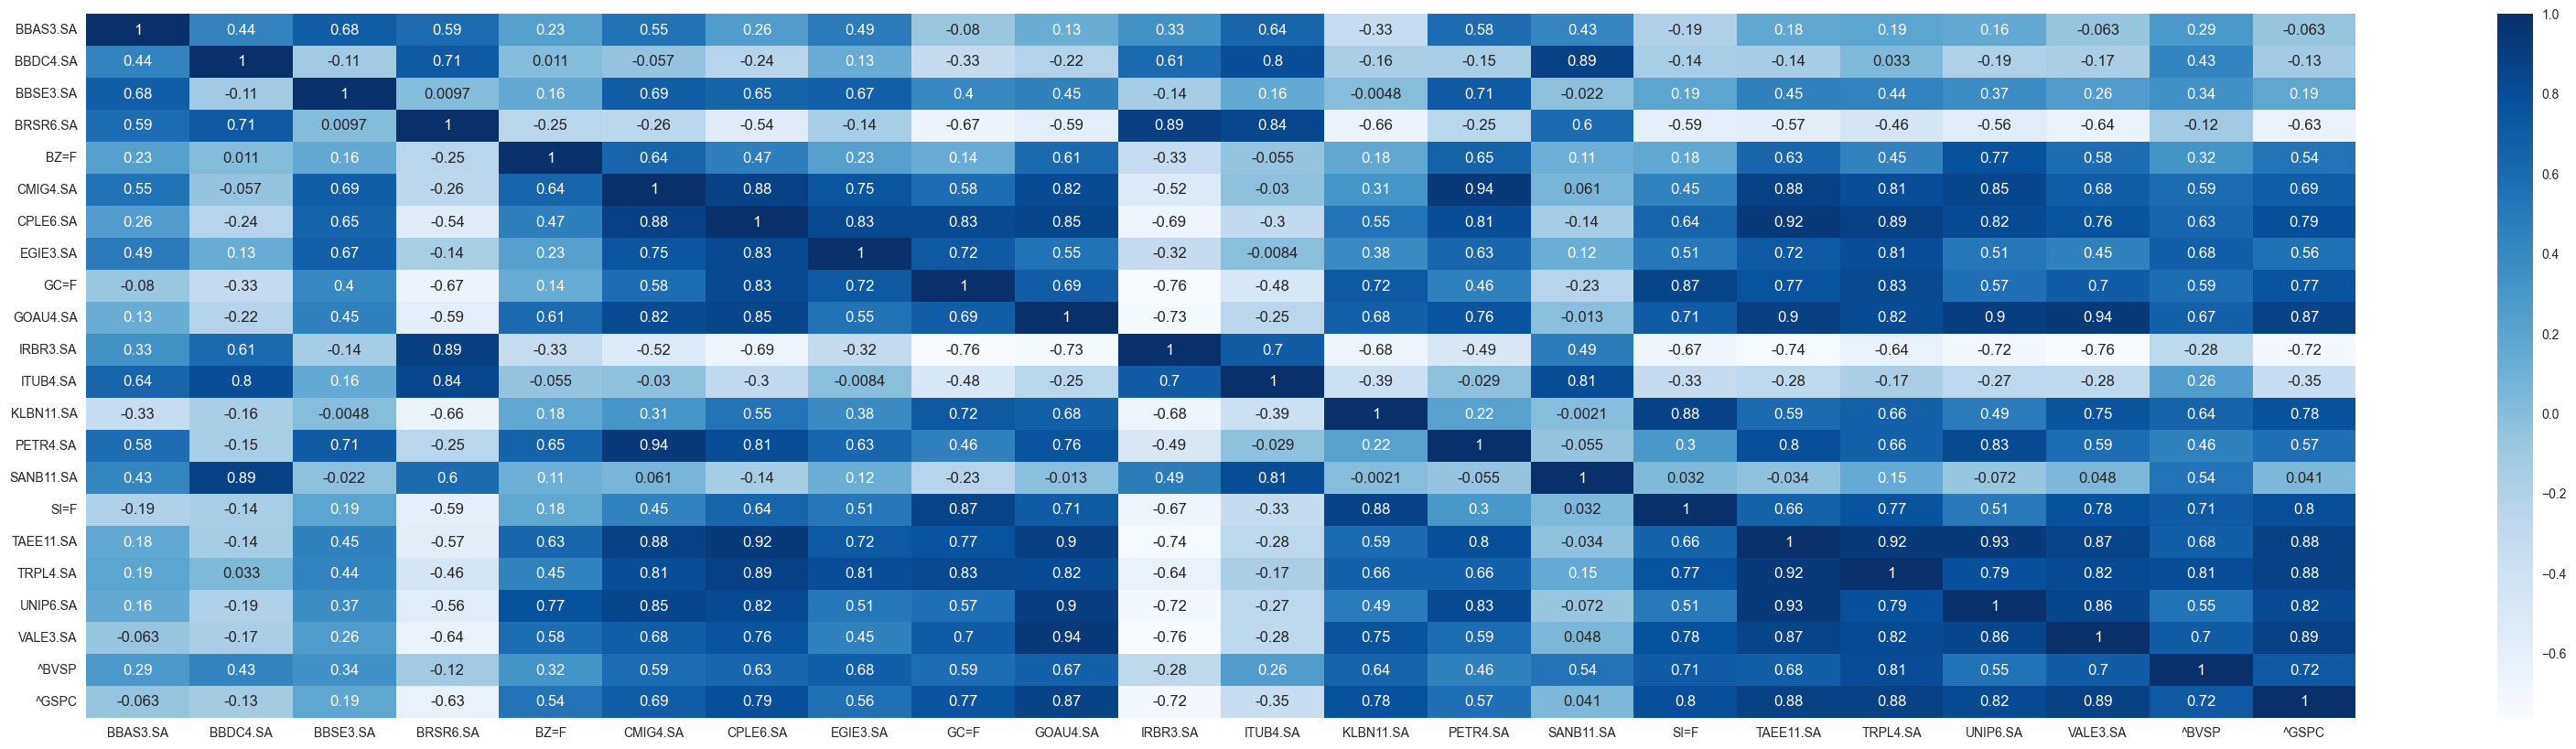

In [6]:
#Correlação dos itens
plt.figure(figsize=(40, 10))  # Set width=8 inches, height=6 inches
sns.heatmap(stock_data.corr(), annot=True, cmap="Blues" )
plt.show()

In [7]:
# Criar as métricas de 30 dias antes
stock_data_MM_30 = stock_data.rolling(30).mean().shift()
stock_data_MM_30 = stock_data_MM_30.add_suffix('_MM_30')

# Compute previous day's closing price
stock_data_FECHAMENTO_ANTERIOR = stock_data.shift(1)
stock_data_FECHAMENTO_ANTERIOR = stock_data_FECHAMENTO_ANTERIOR.add_suffix('_FECHAMENTO_ANTERIOR')

# Compute result after 30 days
stock_data_RESULT_30 = stock_data.shift(-30)
stock_data_RESULT_30 = stock_data_RESULT_30.add_suffix('_RESULT_30')

result_data = pd.concat([stock_data, stock_data_MM_30, stock_data_FECHAMENTO_ANTERIOR, stock_data_RESULT_30], axis=1)

column_list = []

for coluna in  stock_data.columns:
    if coluna in acoes:
        result_data[coluna + '_DIFF'] = (result_data[coluna + '_RESULT_30'] / result_data[coluna + '_FECHAMENTO_ANTERIOR'] - 1) * 100    
        column_list.append(coluna + '_DIFF')

In [8]:
#Predição atual dos valores
df_predicao_atual = result_data.copy()
df_predicao_atual = df_predicao_atual.tail(10)
df_predicao_atual.reset_index(inplace=True)
df_predicao_atual = df_predicao_atual.drop(['Date'
                        , 'BBAS3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BRSR6.SA', 'BZ=F', 'CMIG4.SA', 'CPLE6.SA', 'EGIE3.SA', 'GC=F', 'GOAU4.SA', 'IRBR3.SA', 'ITUB4.SA', 'KLBN11.SA', 'PETR4.SA', 'SANB11.SA', 'SI=F', 'TAEE11.SA', 'TRPL4.SA', 'UNIP6.SA', 'VALE3.SA', '^BVSP', '^GSPC'
                        , 'BBAS3.SA_RESULT_30', 'BBDC4.SA_RESULT_30', 'BBSE3.SA_RESULT_30', 'BRSR6.SA_RESULT_30', 'BZ=F_RESULT_30', 'CMIG4.SA_RESULT_30', 'CPLE6.SA_RESULT_30', 'EGIE3.SA_RESULT_30', 'GC=F_RESULT_30', 'GOAU4.SA_RESULT_30', 'IRBR3.SA_RESULT_30', 'ITUB4.SA_RESULT_30', 'KLBN11.SA_RESULT_30', 'PETR4.SA_RESULT_30', 'SANB11.SA_RESULT_30', 'SI=F_RESULT_30', 'TAEE11.SA_RESULT_30', 'TRPL4.SA_RESULT_30', 'UNIP6.SA_RESULT_30', 'VALE3.SA_RESULT_30', '^BVSP_RESULT_30', '^GSPC_RESULT_30'
                        , 'BBAS3.SA_DIFF', 'BBDC4.SA_DIFF', 'BBSE3.SA_DIFF', 'BRSR6.SA_DIFF', 'CMIG4.SA_DIFF', 'CPLE6.SA_DIFF', 'EGIE3.SA_DIFF', 'GOAU4.SA_DIFF', 'IRBR3.SA_DIFF', 'ITUB4.SA_DIFF', 'KLBN11.SA_DIFF', 'PETR4.SA_DIFF', 'SANB11.SA_DIFF', 'TAEE11.SA_DIFF', 'TRPL4.SA_DIFF', 'UNIP6.SA_DIFF', 'VALE3.SA_DIFF'
                        #, 'COLUNA_MAIOR_VALOR', 'INDEX_ACAO'
                      ], axis='columns')



df_predicao_atual.head(10)

,BBAS3.SA_MM_30,BBDC4.SA_MM_30,BBSE3.SA_MM_30,BRSR6.SA_MM_30,BZ=F_MM_30,CMIG4.SA_MM_30,CPLE6.SA_MM_30,EGIE3.SA_MM_30,GC=F_MM_30,GOAU4.SA_MM_30,IRBR3.SA_MM_30,ITUB4.SA_MM_30,KLBN11.SA_MM_30,PETR4.SA_MM_30,SANB11.SA_MM_30,SI=F_MM_30,TAEE11.SA_MM_30,TRPL4.SA_MM_30,UNIP6.SA_MM_30,VALE3.SA_MM_30,^BVSP_MM_30,^GSPC_MM_30,BBAS3.SA_FECHAMENTO_ANTERIOR,BBDC4.SA_FECHAMENTO_ANTERIOR,BBSE3.SA_FECHAMENTO_ANTERIOR,BRSR6.SA_FECHAMENTO_ANTERIOR,BZ=F_FECHAMENTO_ANTERIOR,CMIG4.SA_FECHAMENTO_ANTERIOR,CPLE6.SA_FECHAMENTO_ANTERIOR,EGIE3.SA_FECHAMENTO_ANTERIOR,GC=F_FECHAMENTO_ANTERIOR,GOAU4.SA_FECHAMENTO_ANTERIOR,IRBR3.SA_FECHAMENTO_ANTERIOR,ITUB4.SA_FECHAMENTO_ANTERIOR,KLBN11.SA_FECHAMENTO_ANTERIOR,PETR4.SA_FECHAMENTO_ANTERIOR,SANB11.SA_FECHAMENTO_ANTERIOR,SI=F_FECHAMENTO_ANTERIOR,TAEE11.SA_FECHAMENTO_ANTERIOR,TRPL4.SA_FECHAMENTO_ANTERIOR,UNIP6.SA_FECHAMENTO_ANTERIOR,VALE3.SA_FECHAMENTO_ANTERIOR,^BVSP_FECHAMENTO_ANTERIOR,^GSPC_FECHAMENTO_ANTERIOR
0,43.095272,15.187937,32.344333,11.285643,75.845001,11.914479,7.719333,42.111993,1986.546663,11.261673,35.204000,26.300030,20.521680,24.112898,28.999334,24.230400,36.795831,24.264000,67.691667,68.161334,108523.766667,4167.872347,47.413212,16.658930,31.070000,12.946042,74.790001,12.361501,7.98,43.919998,1962.199951,11.79,37.990002,27.545071,21.270000,28.418999,30.820000,24.334000,38.009998,25.240000,71.940002,68.360001,117019.0,4298.859863
1,43.341049,15.295142,32.213000,11.404928,75.650001,11.930635,7.722667,42.283650,1985.533333,11.290234,35.524333,26.372500,20.653837,24.331953,29.120334,24.200867,36.899284,24.364000,68.045000,68.056334,109024.566667,4177.303687,49.131371,16.520597,30.830000,13.590416,71.839996,12.588045,7.95,44.150002,1955.300049,11.76,37.709999,27.247822,21.969999,28.916424,29.820000,23.985001,38.160000,25.350000,74.199997,67.120003,117336.0,4338.930176
2,43.568150,15.394465,32.088000,11.520319,75.514000,11.935661,7.720000,42.443581,1984.023332,11.312901,35.827667,26.440366,20.793672,24.567225,29.244334,24.159967,36.979417,24.453667,68.309667,67.925334,109485.233333,4185.092342,48.619999,16.540359,30.610001,13.580652,74.290001,12.361501,7.86,43.990002,1944.599976,11.70,37.349998,27.554979,22.219999,28.860001,30.299999,23.756001,37.650002,25.160000,72.040001,67.830002,116743.0,4369.009766
3,43.798684,15.494454,31.962000,11.646152,75.302667,11.948794,7.716000,42.618338,1982.863334,11.338534,36.053000,26.516496,20.918635,24.829112,29.356333,24.128133,37.038627,24.533333,68.636333,67.812667,109973.133333,4191.862671,48.860001,16.649048,30.530001,14.127394,73.199997,12.558496,7.90,44.779999,1955.300049,12.12,38.230000,27.931496,22.540001,30.100000,30.230000,24.044001,38.110001,25.440001,75.050003,69.019997,119069.0,4372.589844
4,44.095824,15.602660,31.840667,11.774306,75.314334,11.961927,7.711333,42.798889,1980.980001,11.376157,36.188333,26.637928,21.054294,25.097365,29.498333,24.077700,37.105480,24.603000,69.099334,67.813334,110549.600000,4202.071330,49.860001,16.698452,30.580000,14.090000,75.669998,12.568346,7.88,44.810001,1957.800049,12.10,38.200001,28.298101,22.910000,29.389999,30.770000,23.891001,38.009998,25.209999,76.800003,69.559998,119221.0,4425.839844
5,44.384872,15.708599,31.738333,11.905487,75.457000,11.968165,7.708000,42.971984,1978.640002,11.412543,36.410667,26.763653,21.165378,25.376454,29.631000,24.031033,37.151333,24.651333,69.567000,67.835667,111114.966667,4212.699325,49.490002,16.747856,30.450001,14.210000,76.610001,12.223603,7.77,45.200001,1958.400024,12.17,38.500000,28.387276,22.879999,29.639999,30.530001,24.076000,37.389999,24.900000,76.050003,69.669998,118758.0,4409.589844
6,44.688921,15.815210,31.642000,12.041344,75.570334,11.987208,7.706333,43.118962,1974.890002,11.462594,36.669000,26.895201,21.295577,25.675281,29.762000,23.936300,37.222667,24.703333,70.123667,67.860667,111696.566667,4223.615658,50.400002,17.083801,30.230000,14.620000,75.900002,12.548646,7.90,45.270000,1935.500000,12.21,38.389999,28.760000,23.090000,30.570000,30.940001,23.193001,37.830002,25.379999,7

In [9]:
result_data['COLUNA_MAIOR_VALOR'] = result_data[column_list].idxmax(axis=1)
result_data.dropna(inplace=True)

## Compute result difference
def set_valor(row):
    col_name = row['COLUNA_MAIOR_VALOR']
    valor = row[col_name]        
    return acoes.index(col_name.replace('_DIFF', '')) if valor > 6 else -1

result_data['INDEX_ACAO'] = result_data.apply(set_valor, axis=1)        

In [10]:
#result_data.dtypes

In [11]:
result_data.reset_index(inplace=True)

In [12]:
result_data['Date'].max()

Timestamp('2023-05-10 00:00:00')

In [13]:
df_predicao = result_data.drop(['Date'
                        , 'BBAS3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BRSR6.SA', 'BZ=F', 'CMIG4.SA', 'CPLE6.SA', 'EGIE3.SA', 'GC=F', 'GOAU4.SA', 'IRBR3.SA', 'ITUB4.SA', 'KLBN11.SA', 'PETR4.SA', 'SANB11.SA', 'SI=F', 'TAEE11.SA', 'TRPL4.SA', 'UNIP6.SA', 'VALE3.SA', '^BVSP', '^GSPC'
                        , 'BBAS3.SA_RESULT_30', 'BBDC4.SA_RESULT_30', 'BBSE3.SA_RESULT_30', 'BRSR6.SA_RESULT_30', 'BZ=F_RESULT_30', 'CMIG4.SA_RESULT_30', 'CPLE6.SA_RESULT_30', 'EGIE3.SA_RESULT_30', 'GC=F_RESULT_30', 'GOAU4.SA_RESULT_30', 'IRBR3.SA_RESULT_30', 'ITUB4.SA_RESULT_30', 'KLBN11.SA_RESULT_30', 'PETR4.SA_RESULT_30', 'SANB11.SA_RESULT_30', 'SI=F_RESULT_30', 'TAEE11.SA_RESULT_30', 'TRPL4.SA_RESULT_30', 'UNIP6.SA_RESULT_30', 'VALE3.SA_RESULT_30', '^BVSP_RESULT_30', '^GSPC_RESULT_30'
                        , 'BBAS3.SA_DIFF', 'BBDC4.SA_DIFF', 'BBSE3.SA_DIFF', 'BRSR6.SA_DIFF', 'CMIG4.SA_DIFF', 'CPLE6.SA_DIFF', 'EGIE3.SA_DIFF', 'GOAU4.SA_DIFF', 'IRBR3.SA_DIFF', 'ITUB4.SA_DIFF', 'KLBN11.SA_DIFF', 'PETR4.SA_DIFF', 'SANB11.SA_DIFF', 'TAEE11.SA_DIFF', 'TRPL4.SA_DIFF', 'UNIP6.SA_DIFF', 'VALE3.SA_DIFF'
                        , 'COLUNA_MAIOR_VALOR'
                      ], axis='columns')

## Arrumando os dados para a preedição

In [14]:
x_df_predicao = df_predicao.iloc[:,0:-1].values
y_df_predicao = df_predicao.iloc[:, -1].values

In [15]:
df_predicao.iloc[:,0:-1].columns, df_predicao_atual.columns

(Index(['BBAS3.SA_MM_30', 'BBDC4.SA_MM_30', 'BBSE3.SA_MM_30', 'BRSR6.SA_MM_30',
        'BZ=F_MM_30', 'CMIG4.SA_MM_30', 'CPLE6.SA_MM_30', 'EGIE3.SA_MM_30',
        'GC=F_MM_30', 'GOAU4.SA_MM_30', 'IRBR3.SA_MM_30', 'ITUB4.SA_MM_30',
        'KLBN11.SA_MM_30', 'PETR4.SA_MM_30', 'SANB11.SA_MM_30', 'SI=F_MM_30',
        'TAEE11.SA_MM_30', 'TRPL4.SA_MM_30', 'UNIP6.SA_MM_30', 'VALE3.SA_MM_30',
        '^BVSP_MM_30', '^GSPC_MM_30', 'BBAS3.SA_FECHAMENTO_ANTERIOR',
        'BBDC4.SA_FECHAMENTO_ANTERIOR', 'BBSE3.SA_FECHAMENTO_ANTERIOR',
        'BRSR6.SA_FECHAMENTO_ANTERIOR', 'BZ=F_FECHAMENTO_ANTERIOR',
        'CMIG4.SA_FECHAMENTO_ANTERIOR', 'CPLE6.SA_FECHAMENTO_ANTERIOR',
        'EGIE3.SA_FECHAMENTO_ANTERIOR', 'GC=F_FECHAMENTO_ANTERIOR',
        'GOAU4.SA_FECHAMENTO_ANTERIOR', 'IRBR3.SA_FECHAMENTO_ANTERIOR',
        'ITUB4.SA_FECHAMENTO_ANTERIOR', 'KLBN11.SA_FECHAMENTO_ANTERIOR',
        'PETR4.SA_FECHAMENTO_ANTERIOR', 'SANB11.SA_FECHAMENTO_ANTERIOR',
        'SI=F_FECHAMENTO_ANTERIOR', 'TAEE

In [16]:
scaler_df = StandardScaler()
x_df_predicao = scaler_df.fit_transform(x_df_predicao)

In [17]:
x_df_treinamento, x_df_teste, y_df_treinamento, y_df_teste =  train_test_split(x_df_predicao, y_df_predicao, test_size = 0.30, random_state = 0)

In [18]:
x_df_treinamento.shape, y_df_treinamento.shape

((800, 44), (800,))

In [19]:
x_df_teste.shape, y_df_teste.shape

((343, 44), (343,))

# Aplicando algorítmo Random Forrest

In [20]:
random_forest_df = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_df.fit(x_df_treinamento, y_df_treinamento.ravel())
random_forest_df_previsores = random_forest_df.predict(x_df_teste)

In [21]:
accuracy_score(y_df_teste, random_forest_df_previsores)

0.7988338192419825

0.7988338192419825

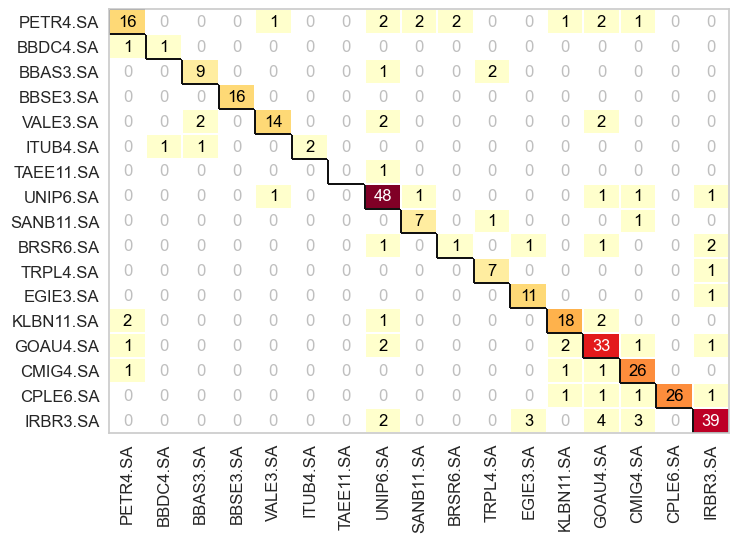

In [22]:
cm = ConfusionMatrix(random_forest_df, classes=acoes)
cm.fit(x_df_treinamento, y_df_treinamento)
cm.score(x_df_teste, y_df_teste)

In [23]:
print(classification_report(y_df_teste, random_forest_df_previsores))

              precision    recall  f1-score   support

          -1       0.86      0.83      0.84        29
           0       0.76      0.59      0.67        27
           1       0.50      0.50      0.50         2
           2       0.75      0.75      0.75        12
           3       1.00      1.00      1.00        16
           4       0.88      0.70      0.78        20
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         1
           7       0.80      0.91      0.85        53
           8       0.70      0.78      0.74         9
           9       0.33      0.17      0.22         6
          10       0.70      0.88      0.78         8
          11       0.73      0.92      0.81        12
          12       0.78      0.78      0.78        23
          13       0.70      0.82      0.76        40
          14       0.76      0.90      0.83        29
          15       1.00      0.87      0.93        30
          16       0.83    

C:\Users\dexter\Desktop\projetos\MBA_PUC\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexter\Desktop\projetos\MBA_PUC\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexter\Desktop\projetos\MBA_PUC\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# Predição do que fazer hoje

In [24]:
x_df_predicao_atual = df_predicao_atual.values
scaler_df = StandardScaler()
x_df_predicao_atual = scaler_df.fit_transform(x_df_predicao_atual)

random_forest_df_previsores_atual = random_forest_df.predict(x_df_predicao_atual)

In [25]:
## for a in x_df_predicao_atual:
    #for b in a:
        #print(b)

for a in random_forest_df_previsores_atual:
    print(acoes[a] if a != -1 else 'Não fazer nada')

df_predicao_atual

#print( acoes[random_forest_df_previsores_atual] if random_forest_df_previsores_atual != -1 else 'Não fazer nada')

#print('Comprar: ' + acoes[random_forest_df_previsores_atual])


#if random_forest_df_previsores_atual != -1:
    #print('Comprar: ' + acoes[random_forest_df_previsores_atual])
#else:
    #print('Não fazer nada!')

VALE3.SA
PETR4.SA
UNIP6.SA
UNIP6.SA
UNIP6.SA
UNIP6.SA
UNIP6.SA
Não fazer nada
CPLE6.SA
Não fazer nada


,BBAS3.SA_MM_30,BBDC4.SA_MM_30,BBSE3.SA_MM_30,BRSR6.SA_MM_30,BZ=F_MM_30,CMIG4.SA_MM_30,CPLE6.SA_MM_30,EGIE3.SA_MM_30,GC=F_MM_30,GOAU4.SA_MM_30,IRBR3.SA_MM_30,ITUB4.SA_MM_30,KLBN11.SA_MM_30,PETR4.SA_MM_30,SANB11.SA_MM_30,SI=F_MM_30,TAEE11.SA_MM_30,TRPL4.SA_MM_30,UNIP6.SA_MM_30,VALE3.SA_MM_30,^BVSP_MM_30,^GSPC_MM_30,BBAS3.SA_FECHAMENTO_ANTERIOR,BBDC4.SA_FECHAMENTO_ANTERIOR,BBSE3.SA_FECHAMENTO_ANTERIOR,BRSR6.SA_FECHAMENTO_ANTERIOR,BZ=F_FECHAMENTO_ANTERIOR,CMIG4.SA_FECHAMENTO_ANTERIOR,CPLE6.SA_FECHAMENTO_ANTERIOR,EGIE3.SA_FECHAMENTO_ANTERIOR,GC=F_FECHAMENTO_ANTERIOR,GOAU4.SA_FECHAMENTO_ANTERIOR,IRBR3.SA_FECHAMENTO_ANTERIOR,ITUB4.SA_FECHAMENTO_ANTERIOR,KLBN11.SA_FECHAMENTO_ANTERIOR,PETR4.SA_FECHAMENTO_ANTERIOR,SANB11.SA_FECHAMENTO_ANTERIOR,SI=F_FECHAMENTO_ANTERIOR,TAEE11.SA_FECHAMENTO_ANTERIOR,TRPL4.SA_FECHAMENTO_ANTERIOR,UNIP6.SA_FECHAMENTO_ANTERIOR,VALE3.SA_FECHAMENTO_ANTERIOR,^BVSP_FECHAMENTO_ANTERIOR,^GSPC_FECHAMENTO_ANTERIOR
0,43.095272,15.187937,32.344333,11.285643,75.845001,11.914479,7.719333,42.111993,1986.546663,11.261673,35.204000,26.300030,20.521680,24.112898,28.999334,24.230400,36.795831,24.264000,67.691667,68.161334,108523.766667,4167.872347,47.413212,16.658930,31.070000,12.946042,74.790001,12.361501,7.98,43.919998,1962.199951,11.79,37.990002,27.545071,21.270000,28.418999,30.820000,24.334000,38.009998,25.240000,71.940002,68.360001,117019.0,4298.859863
1,43.341049,15.295142,32.213000,11.404928,75.650001,11.930635,7.722667,42.283650,1985.533333,11.290234,35.524333,26.372500,20.653837,24.331953,29.120334,24.200867,36.899284,24.364000,68.045000,68.056334,109024.566667,4177.303687,49.131371,16.520597,30.830000,13.590416,71.839996,12.588045,7.95,44.150002,1955.300049,11.76,37.709999,27.247822,21.969999,28.916424,29.820000,23.985001,38.160000,25.350000,74.199997,67.120003,117336.0,4338.930176
2,43.568150,15.394465,32.088000,11.520319,75.514000,11.935661,7.720000,42.443581,1984.023332,11.312901,35.827667,26.440366,20.793672,24.567225,29.244334,24.159967,36.979417,24.453667,68.309667,67.925334,109485.233333,4185.092342,48.619999,16.540359,30.610001,13.580652,74.290001,12.361501,7.86,43.990002,1944.599976,11.70,37.349998,27.554979,22.219999,28.860001,30.299999,23.756001,37.650002,25.160000,72.040001,67.830002,116743.0,4369.009766
3,43.798684,15.494454,31.962000,11.646152,75.302667,11.948794,7.716000,42.618338,1982.863334,11.338534,36.053000,26.516496,20.918635,24.829112,29.356333,24.128133,37.038627,24.533333,68.636333,67.812667,109973.133333,4191.862671,48.860001,16.649048,30.530001,14.127394,73.199997,12.558496,7.90,44.779999,1955.300049,12.12,38.230000,27.931496,22.540001,30.100000,30.230000,24.044001,38.110001,25.440001,75.050003,69.019997,119069.0,4372.589844
4,44.095824,15.602660,31.840667,11.774306,75.314334,11.961927,7.711333,42.798889,1980.980001,11.376157,36.188333,26.637928,21.054294,25.097365,29.498333,24.077700,37.105480,24.603000,69.099334,67.813334,110549.600000,4202.071330,49.860001,16.698452,30.580000,14.090000,75.669998,12.568346,7.88,44.810001,1957.800049,12.10,38.200001,28.298101,22.910000,29.389999,30.770000,23.891001,38.009998,25.209999,76.800003,69.559998,119221.0,4425.839844
5,44.384872,15.708599,31.738333,11.905487,75.457000,11.968165,7.708000,42.971984,1978.640002,11.412543,36.410667,26.763653,21.165378,25.376454,29.631000,24.031033,37.151333,24.651333,69.567000,67.835667,111114.966667,4212.699325,49.490002,16.747856,30.450001,14.210000,76.610001,12.223603,7.77,45.200001,1958.400024,12.17,38.500000,28.387276,22.879999,29.639999,30.530001,24.076000,37.389999,24.900000,76.050003,69.669998,118758.0,4409.589844
6,44.688921,15.815210,31.642000,12.041344,75.570334,11.987208,7.706333,43.118962,1974.890002,11.462594,36.669000,26.895201,21.295577,25.675281,29.762000,23.936300,37.222667,24.703333,70.123667,67.860667,111696.566667,4223.615658,50.400002,17.083801,30.230000,14.620000,75.900002,12.548646,7.90,45.270000,1935.500000,12.21,38.389999,28.760000,23.090000,30.570000,30.940001,23.193001,37.830002,25.379999,7